# Prenatal Brain Genome Tracks

In [1]:
!date; hostname

Sun Oct 27 18:48:43 PDT 2024
c4-dev3


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/pygenometracks


In [3]:
import os
import subprocess
#from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [4]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [5]:
# import sys
# !{sys.executable} -m pip install pybiomart

from pybiomart import Dataset

In [6]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [7]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/'

In [8]:
# diff_spl_introns = pd.read_csv(input_dir+'diff_introns_T4.csv')

In [9]:
# diff_spl_intron_groups = pd.read_csv(input_dir+'diff_intron_groups_T4.csv')

In [10]:
adata_gene = sc.read_h5ad(input_dir+'scANVI_label.h5ad')

In [11]:
cat_list = adata_gene.obs.C_scANVI_simple.cat.categories.tolist()
dict(zip(cat_list, cat_list))

{'Astrocyte': 'Astrocyte',
 'EN-PFC': 'EN-PFC',
 'EN-V1': 'EN-V1',
 'Endothelial': 'Endothelial',
 'Glyc': 'Glyc',
 'IN-CTX-CGE': 'IN-CTX-CGE',
 'IN-CTX-MGE': 'IN-CTX-MGE',
 'IN-STR': 'IN-STR',
 'IPC-div': 'IPC-div',
 'IPC-nEN': 'IPC-nEN',
 'MGE-IPC': 'MGE-IPC',
 'MGE-RG': 'MGE-RG',
 'MGE-div': 'MGE-div',
 'Microglia': 'Microglia',
 'Mural': 'Mural',
 'OPC': 'OPC',
 'RG': 'RG',
 'RG-div': 'RG-div',
 'RBC': 'RBC',
 'nEN': 'nEN',
 'nIN': 'nIN'}

In [12]:
simplify_dict = {'Astrocyte': 'Astrocyte',
 'EN-PFC': 'EN-PFC',
 'EN-V1': 'EN-V1',
 'Endothelial': 'Endothelial',
 'Glyc': 'Glyc',
 'IN-CTX-CGE': 'IN-CTX-CGE',
 'IN-CTX-MGE': 'IN-CTX-MGE',
 'IN-STR': 'IN-STR',
 'IPC-div': 'IPC-nEN',
 'IPC-nEN': 'IPC-nEN',
 'MGE-IPC': 'MGE-IPC',
 'MGE-RG': 'MGE-RG',
 'MGE-div': 'MGE-RG',
 'Microglia': 'Microglia',
 'Mural': 'Mural',
 'OPC': 'OPC',
 'RG': 'RG',
 'RG-div': 'RG',
 'RBC': 'RBC',
 'nEN': 'nEN',
 'nIN': 'nIN'}

In [13]:
adata_gene.obs['C_scANVI_simple'] = adata_gene.obs.C_scANVI_simple.map(simplify_dict)

In [14]:
##fix celltype palette 

cmap = pd.read_csv('celltype_colors.csv')

cmap['celltype_simple'] = cmap['0'].map(simplify_dict)

cmap = cmap.drop_duplicates(subset='celltype_simple',keep='first')

cmap.loc[16], cmap.loc[18] =  cmap.loc[18].copy(), cmap.loc[16].copy()

adata_gene.uns['C_scANVI_simple_colors'] = cmap['1']

... storing 'C_scANVI_simple' as categorical


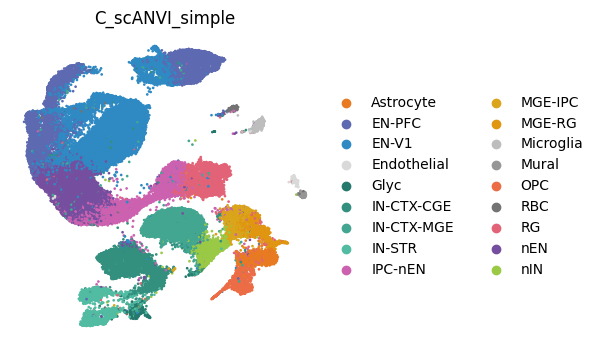

In [15]:
plt.rcParams['figure.figsize'] = 4,4
sc.pl.umap(adata_gene,
          color='C_scANVI_simple',
           size=15,
           frameon=False
          )

In [16]:
groups_test = adata_gene.obs['C_scANVI_simple'].value_counts()[:15].index.values.astype(str).tolist()

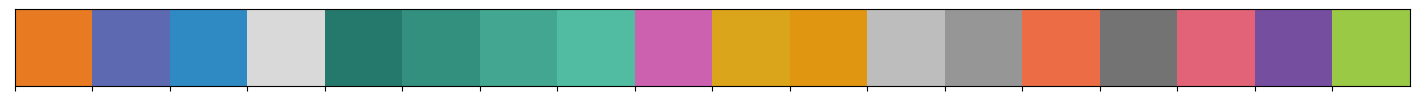

In [17]:
sns.palplot(adata_gene.uns['C_scANVI_simple_colors'])

In [18]:
# exp_layer = sc.read_h5ad('exp_layers_annot.h5ad')

# exp_layer = exp_layer[exp_layer.obs_names.isin(adata_gene.obs_names)]

# adata_gene.layers['nb_sample'] = exp_layer.layers['nb_sample']

In [193]:
# sig_diff_spl_intron_groups = pd.read_csv(input_dir+'diff_spliced_intron_groups_all_3prime_bias.csv',index_col=0) 
# sig_diff_spl_introns = pd.read_csv(input_dir+'diff_spliced_introns_all_3prime_bias.csv',index_col=0)




In [194]:
diff_spl_introns = pd.read_csv(input_dir+ 'diff_spliced_introns_all_equal.csv',index_col=0)
diff_spl_intron_groups = pd.read_csv(input_dir+'diff_spliced_intron_groups_all_equal.csv',index_col=0)

In [195]:
sig_diff_spl_intron_groups = pd.read_csv("./sig_diff_spliced_intron_groups.csv",index_col=0)
sig_diff_spl_introns = pd.read_csv("./sig_diff_spliced_introns_annotated.csv",index_col=0)

In [196]:
# sig_diff_spl_introns.event_type.unique()

In [197]:
# sig_diff_spl_introns[sig_diff_spl_introns.event_type == 'MXE'].head(60)

In [198]:
sig_diff_spl_introns[sig_diff_spl_introns.gene_name == 'CAST'].name.unique()

array(['CAST_chr5:96722699-96726753', 'CAST_chr5:96722699-96726793',
       'CAST_chr5:96722699-96727488', 'CAST_chr5:96727531-96729152',
       'CAST_chr5:96727531-96729611'], dtype=object)

In [199]:
set([i for i in list(sig_diff_spl_introns.gene_name) if i.startswith('CAST')])

{'CAST'}

In [200]:
# sashimi_introns =sig_diff_spl_introns[(
#     sig_diff_spl_introns.gene_name == 'DNM3') & 
#     (sig_diff_spl_introns.n_cells >= 0)]


sashimi_introns =diff_spl_introns[(
    diff_spl_introns.gene_name == 'CAST') &  
    (diff_spl_introns.n_cells >= 0)]


In [201]:
sashimi_introns['intron_group']

21074     CAST_chr5_96722638_+
21075     CAST_chr5_96722638_+
49045     CAST_chr5_96722699_+
49046     CAST_chr5_96722699_+
49047     CAST_chr5_96722699_+
                  ...         
535541    CAST_chr5_96722638_+
535542    CAST_chr5_96722638_+
540765    CAST_chr5_96722699_+
540766    CAST_chr5_96722699_+
540767    CAST_chr5_96722699_+
Name: intron_group, Length: 78, dtype: object

In [202]:
intron_group = sashimi_introns['intron_group']

In [203]:
intron_group.unique()

array(['CAST_chr5_96722638_+', 'CAST_chr5_96722699_+',
       'CAST_chr5_96727531_+'], dtype=object)

In [204]:
# sashimi_introns = sashimi_introns[sashimi_introns.intron_group == 'ADD3_chr10_110133325_+']
# intron_group = 'ADD3_chr10_110133325_+'

# sashimi_introns = sashimi_introns[sashimi_introns.intron_group == 'KIF3A_chr5_132703620_-']
# intron_group = 'KIF3A_chr5_132703620_-'

sashimi_introns = sashimi_introns[sashimi_introns.intron_group == intron_group.unique()[2]]
intron_group = intron_group.unique()[2]



In [205]:
sashimi_introns['intron_group'].unique()

array(['CAST_chr5_96727531_+'], dtype=object)

In [206]:
link_files=[]

starts=list()
ends=list()

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)

        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]

        number_introns = len(sashimi_introns_) #sashimi_introns_.iloc[[0]].intron_group_size.values[0]

        os.makedirs(f"./sashimi_plots/{intron_group}/",exist_ok=True)

        f = open(f"./sashimi_plots/{intron_group}/link_{name}.txt", "w+")

        for intron in range(number_introns):
            f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                   )
            starts.append(sashimi_introns_.iloc[[intron]]['start'].values[0])
            ends.append(sashimi_introns_.iloc[[intron]]['end'].values[0])
            chrom = str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])
    else:
        
        link_files.append(name)

        sashimi_introns_ = sashimi_introns.iloc[0]

        number_introns = 1 #len(sashimi_introns_) #sashimi_introns_.iloc[[0]].intron_group_size.values[0]

        os.makedirs(f"./sashimi_plots/{intron_group}/",exist_ok=True)

        f = open(f"./sashimi_plots/{intron_group}/link_{name}.txt", "w+")

        # for intron in range(number_introns):
        f.write(str(sashimi_introns_['chromosome'])+'\t'
                +str(sashimi_introns_['start'])+'\t'
                +str(sashimi_introns_['start'])+'\t'
                +str(sashimi_introns_['chromosome'])+'\t'
                +str(sashimi_introns_['end'])+'\t'
                +str(sashimi_introns_['end'])+'\t'
                +str(0)+'\n'
               )
        starts.append(sashimi_introns_['start'])
        ends.append(sashimi_introns_['end'])
        chrom = str(sashimi_introns_['chromosome'])
            
    f.close()

In [207]:
# intron_group = 'DNM3_chr1_172131174_+'

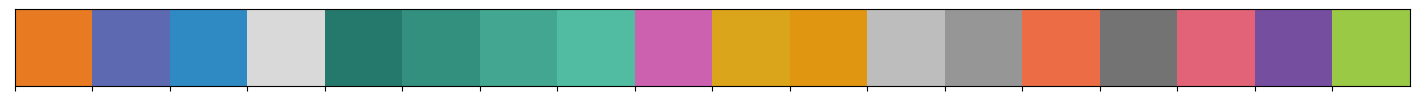

In [208]:
col_color_dict = dict(zip(adata_gene.obs.C_scANVI_simple.cat.categories,adata_gene.uns['C_scANVI_simple_colors']))

#col_color_dict_filtered = {key: col_color_dict[key] for key in mean_deduped.columns.tolist()}

sns.palplot(col_color_dict.values())



In [209]:
col_color_dict

{'Astrocyte': '#e87b22',
 'EN-PFC': '#5d69b1',
 'EN-V1': '#2f8ac4',
 'Endothelial': '#d9d9d9',
 'Glyc': '#24796c',
 'IN-CTX-CGE': '#338f7e',
 'IN-CTX-MGE': '#43a691',
 'IN-STR': '#52bca3',
 'IPC-nEN': '#cc61b0',
 'MGE-IPC': '#daa51b',
 'MGE-RG': '#e09610',
 'Microglia': '#bdbdbd',
 'Mural': '#969696',
 'OPC': '#eb6c45',
 'RBC': '#737373',
 'RG': '#e26377',
 'nEN': '#764e9f',
 'nIN': '#99c945'}

In [210]:
# link_files_ = ['EN-V1','Astrocyte']

link_files_ = link_files

In [211]:
# order = ['RG','MGE-RG',
#           'OPC',
#          'Astrocyte',
#            'MGE-IPC',
#          'IPC-nEN','nEN',
#          'nIN',
#          'IN-STR','EN-PFC','EN-V1','IN-CTX-CGE','IN-CTX-MGE',
#         'Microglia']

order = ['RG', 'MGE-RG', 'OPC', 'Astrocyte', 'MGE-IPC','IPC-nEN','nIN', 'nEN', 'IN-STR', 'EN-PFC', 'EN-V1', 'IN-CTX-CGE', 'IN-CTX-MGE'] 

order = ['RG', 'MGE-RG', 'OPC', 'Astrocyte', 'MGE-IPC','IPC-nEN','nIN', 'nEN', 'IN-STR', 'EN-PFC', 'EN-V1', 'IN-CTX-CGE', 'IN-CTX-MGE'] 

order = ['EN-V1', 'RG']

In [212]:
link_files

['EN-V1',
 'nEN',
 'EN-PFC',
 'IN-CTX-MGE',
 'IPC-nEN',
 'IN-CTX-CGE',
 'RG',
 'IN-STR',
 'nIN',
 'MGE-IPC',
 'OPC',
 'Astrocyte',
 'MGE-RG',
 'Glyc',
 'Microglia']

In [213]:
link_files_ = order

               #  ['MGE-IPC',
               # 'IPC-nEN',
               # 'OPC',
               # 'MGE-RG',
               # 'Astrocyte',
               # 'RG',
               # 'nIN',
               # 'IN-STR',
               # 'IN-CTX-CGE',
               # 'IN-CTX-MGE',
               # 'nEN',
               # 'EN-PFC',
               # 'EN-V1',]
               
               

In [214]:
##write ini file

ini_file = """
[spacer]
height = 0.5
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/concat_BAMS/concat/SJ/'

for name in link_files_:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/{intron_group}/link_{name}.txt
bw_file = {bw_path}/{name}.bw
height = 2
bw_color = {col_color_dict[name]}
number_of_bins = 500
#max_value = 5
#scale_factor=1
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color = {col_color_dict[name]}
#line_style =
fontsize = 20
# operation = log(bw_file + 1)
scale_link_height = 0.1
scale_line_width = 2
show_number = True
file_type = sashimiBigWig
#orientation = inverted

[spacer]
height = .5


"""

ini_file = ini_file + """


[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/derek/reference/refdata-gex-GRCh38-2024-A/genes/genes.gtf  
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

[spacer]
height = 0.1
[x-axis]
fontsize=14


"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))

In [215]:
# ##write ini file
# #back up paramters

# ini_file = """
# [spacer]
# height = 0.1
# """

# bw_path = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/concat_BAMS/concat/SJ/'

# for name in link_files_:

#     ini_file = ini_file + f"""

# [sashimi file test]
# title = {name}
# link_file = ./sashimi_plots/{intron_group}/link_{name}.txt
# bw_file = {bw_path}/{name}.bw
# height = 2
# bw_color = {col_color_dict[name]}
# number_of_bins = 1000
# #max_value = 6
# #scale_factor=1
# nans_to_zeros = true
# summary_method = mean
# show_data_range = true
# link_color = {col_color_dict[name]}
# #line_style =
# fontsize = 10
# # operation = log(bw_file + 1)
# scale_link_height = 1
# scale_line_width = 1
# show_number = True
# file_type = sashimiBigWig

# [spacer]
# height = .1


# """

# ini_file = ini_file + """
# [spacer]
# height = 1


# [spacer]
# height = 1

# [genes]
# color = black  
# file = /c4/home/derek/data1/derek/reference/human_hg38_reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
# height = 7
# # title = gtf
# # fontsize = 10
# file_type = gtf
# gene_rows = 10

# [spacer]
# height = 0.5
# [x-axis]
# fontsize=10


# """
    
# print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))

In [216]:
#refdata-gex-GRCh38-2020-A/genes/genes.gtf

In [217]:
# from pybiomart import Dataset

# dataset = Dataset(name='hsapiens_gene_ensembl',
#                   host='http://www.ensembl.org')

# genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
#               )

In [218]:
start = np.min(starts)-300
end = np.max(ends)+300

region = chrom+':'+start.astype(str)+'-'+end.astype(str)

In [219]:
region

'chr5:96727231-96729911'

In [220]:
#region='chr8:17715000-17730000' #MTUS1

In [221]:
#region = 'chrX:41555000-41561000'#  ##CASK 

#region = 'chr11:6395000-6411126'# ## APBB1

#region = 'chr2:50500000-50535000' ##NRXN1

#region = 'chr2:50620000-50624000' ##NRXN1

In [222]:
#region = 'chr6:117575253-117580000'

In [223]:
%%bash -s "$region"
pyGenomeTracks \
--tracks ./sashimi_plots/sashimi.ini \
--plotWidth 20 \
--region $1 \
--outFileName ./sashimi_plots/sashimi_test.png \
--decreasingXAxis \


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|██████████| 2/2 [00:00<00:00, 8035.07it/s]
INFO:pygenometracks.tracksClass:initialize 3. [spacer]
INFO:pygenometracks.tracksClass:initialize 4. [sashimi file test]
100%|██████████| 2/2 [00:00<00:00, 10894.30it/s]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [spacer]
INFO:pygenometracks.tracksClass:initialize 7. [genes]
100%|██████████| 85/85 [00:00<00:00, 965.17it/s]
INFO:pygenometracks.tracksClass:initialize 8. [spacer]
INFO:pygenometracks.tracksClass:initialize 9. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:2.5853283405303955
DEBUG:pygenometracks.tracksClass:Figure size in cm is 24.3237639553429 x 16.329787234042552. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [sashimi file test

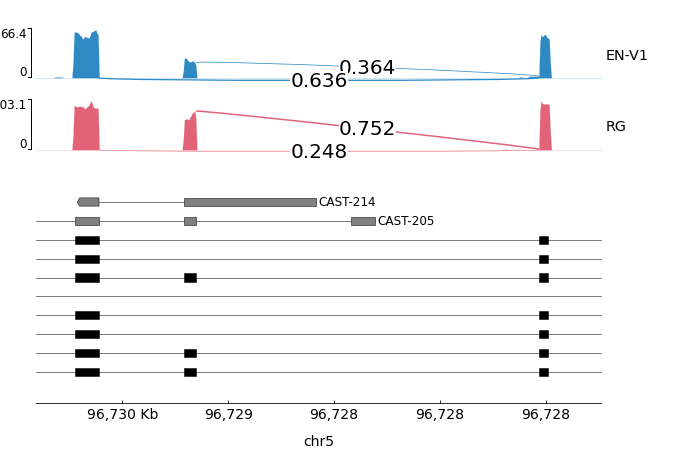

In [224]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_test.png',retina=False)

In [51]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [192]:
%%bash -s "$region"
pyGenomeTracks \
--tracks ./sashimi_plots/sashimi.ini \
--plotWidth 20 \
--region $1 \
-o ./sashimi_plots/CAST_sashimi.pdf \
--decreasingXAxis 



INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|██████████| 3/3 [00:00<00:00, 13706.88it/s]
INFO:pygenometracks.tracksClass:initialize 3. [spacer]
INFO:pygenometracks.tracksClass:initialize 4. [sashimi file test]
100%|██████████| 3/3 [00:00<00:00, 12972.07it/s]
INFO:pygenometracks.tracksClass:initialize 5. [spacer]
INFO:pygenometracks.tracksClass:initialize 6. [spacer]
INFO:pygenometracks.tracksClass:initialize 7. [genes]
100%|██████████| 85/85 [00:00<00:00, 991.61it/s]
INFO:pygenometracks.tracksClass:initialize 8. [spacer]
INFO:pygenometracks.tracksClass:initialize 9. [x-axis]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:2.5737435817718506
DEBUG:pygenometracks.tracksClass:Figure size in cm is 24.3237639553429 x 16.329787234042552. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [sashimi file tes

In [ ]:
#!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --plotWidth 15 --region 'chr1:198690000-198705000' -o ./plots/sashimi_T4_PTPRC.pdf

In [ ]:
sig_introns_sort = sig_diff_spl_introns.reindex(
    sig_diff_spl_introns.abs_delta_psi.abs().sort_values(ascending=False).index)#.head(50)


sig_introns_sort = sig_introns_sort[sig_introns_sort.event_type == 'first_exon']

In [ ]:
sig_diff_spl_introns.event_type

In [ ]:


for gene in sig_introns_sort[200:300]['gene_name']:
    print(gene)
    
    sashimi_introns =sig_diff_spl_introns[(sig_diff_spl_introns.gene_name == gene) & (sig_diff_spl_introns.n_cells >= 50)]
    
    intron_group = sashimi_introns['intron_group'].iloc[1]
    
    link_files=[]

    starts=list()
    ends=list()

    for name in groups_test:
        if name in sashimi_introns.test_group.unique():

            link_files.append(name)

            sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]

            number_introns = len(sashimi_introns_) #sashimi_introns_.iloc[[0]].intron_group_size.values[0]

            os.makedirs(f"./sashimi_plots/{intron_group}/",exist_ok=True)

            f = open(f"./sashimi_plots/{intron_group}/link_{name}.txt", "w+")

            for intron in range(number_introns):
                f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                        +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                       )
                starts.append(sashimi_introns_.iloc[[intron]]['start'].values[0])
                ends.append(sashimi_introns_.iloc[[intron]]['end'].values[0])
                chrom = str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])
            f.close()
            
            
    link_files_ = link_files[0:2]
    
    ini_file = """[spacer]height = 0.1"""

    bw_path = '/c4/home/derek/data1/derek/data_scSLR/prenatal_brain/concat_BAMS/concat/all_reads/'

    for name in link_files_:

        ini_file = ini_file + f"""

        [sashimi file test]
        title = {name}
        link_file = ./sashimi_plots/{intron_group}/link_{name}.txt
        bw_file = {bw_path}/{name}.bw
        height = 5
        bw_color = {col_color_dict[name]}
        number_of_bins = 1000
        max_value = 6
        nans_to_zeros = true
        summary_method = mean
        show_data_range = true
        link_color = {col_color_dict[name]}
        fontsize = 10
        scale_link_height = 0.5
        scale_line_width = 2
        show_number = true
        file_type = sashimiBigWig

        [spacer]
        height = 0.1
        

        """

        print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))
    
    
    start = np.min(starts)-100
    end = np.max(ends)+100 
    
    print(region)
    region = chrom+':'+start.astype(str)+'-'+end.astype(str)
    
    FNULL = open(os.devnull, 'w')
    cmd = ['pyGenomeTracks', '--tracks', './sashimi_plots/sashimi.ini', '--plotWidth', '10', '-o', './sashimi_plots/sashimi_NECTIN3.png', '--region', region]
    subprocess.run(cmd,stdout=FNULL,stderr=subprocess.DEVNULL)
    
    display(Image(filename='./sashimi_plots/sashimi_NECTIN3.png',retina=False))
    
    

    
    
            
    
    
    

In [ ]:
cmd = ['pyGenomeTracks', '--tracks', './sashimi_plots/sashimi.ini', '--plotWidth', '5', '-o', './sashimi_plots/sashimi_NECTIN3.png', '--region', region]

In [ ]:
subprocess.run(cmd)